# Stock price simulation

Using simulated data of stock prices and returns, you can see how total, unpredictable randomness can look like a viable financial time series. This is known as the Monte Carlo simulation, and is used to evaluate the Black-Scholes formula. 

Simulating stock information is also useful when analyzing certain rules of thumb when it comes to ARIMA model selection.

To start, you need to define the following constants, and assume the log returns come from a 'normal' distribution:

* **Number of samples (*T* timesteps)**
* **Initial price amount**
* **Drift term** - the random element in predicting the future price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Number of timesteps
T = 1000

# Initial price 
P0 = 10

# Drift
mu = 0.001

In [3]:
# Initial log price

np.log(P0)

2.302585092994046

**Run the simulation:**

In [4]:
# Set log price as last log price, to be continually updated since current price depends on last price
last_p = np.log(P0)

# Store log returns length of samples
log_returns = np.zeros(T)

# Store prices length of samples
prices = np.zeros(T)

# Loop T iterations
for t in range(T):
    # Sample a log return from normal distribution (std dev is 0.01) - 'random noise'
    r = 0.01 * np.random.randn() 
    
    # Compute the new log price (last price + drift + random noise)
    p = last_p + mu + r 
    
    # Store the log return and price 
    log_returns[t] = r + mu
    prices[t] = np.exp(p)
    
    # Assign log price to last_p for next loop
    last_p = p

**Plot simulated time series (prices):**

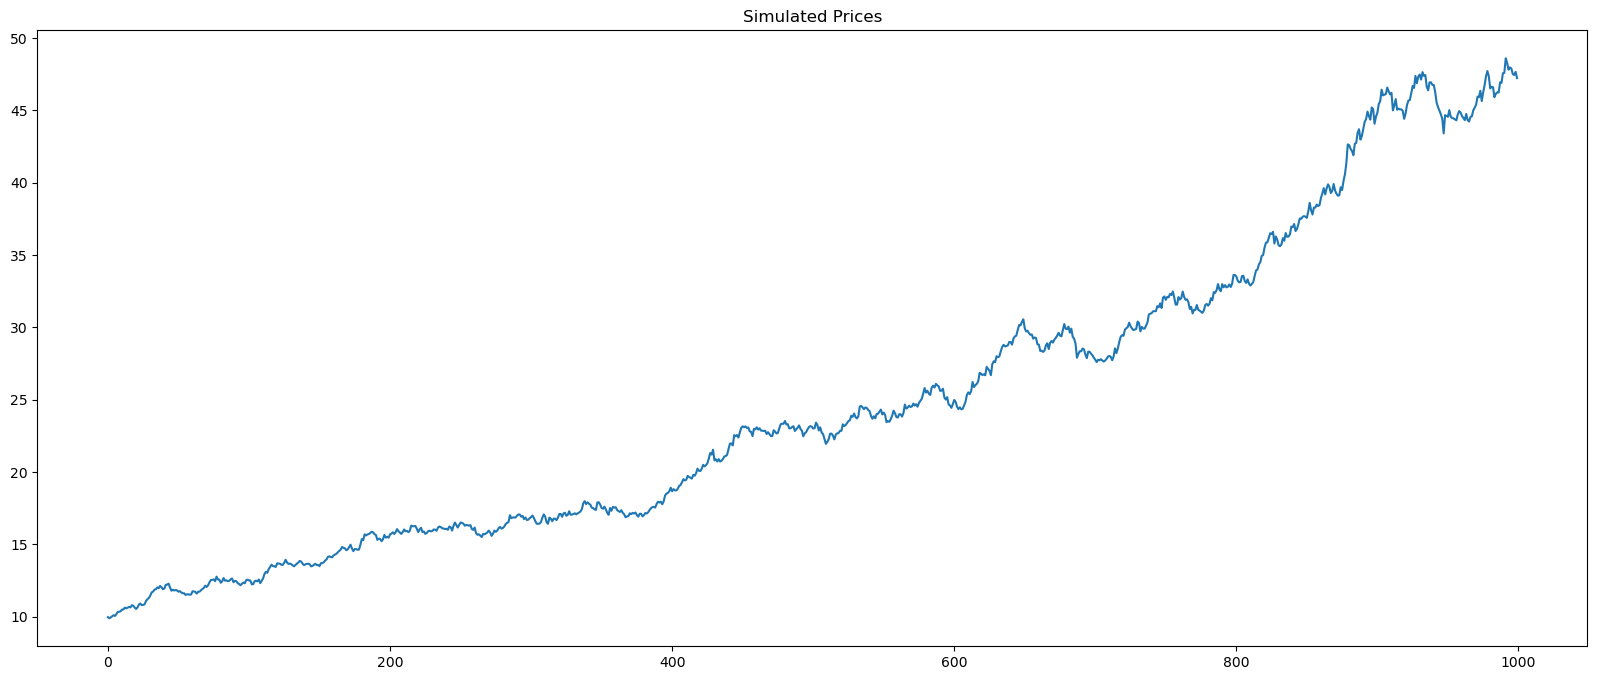

In [5]:
# Plot simulated time series

plt.figure(figsize=(20, 8))
plt.plot(prices)
plt.title("Simulated Prices");

**Seems to behave like a regularly-behaving stock price...there is a steady increase over time with some variation. In summary, you implemented a 'random walk', which is a central theme in forecasting models. It is the probability of each timestep given the probability of a previous timestep, leading to a ‘chain’ of probability states, i.e. the *Markov model*. This is why the graph resembles the behaviour of a stock price.**

## Vectorize the simulation

i.e. run the simulation for multiple variables, e.g. open and close price